# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [2]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Is there a difference in lifetime value between different policy types and coverage?

**Answer**:
When looking at policy and coverage type with respect to lifetime value, basic coverage has the lowest average lifetime value across all three policies. The average lifetime value for basic coverage is under \$500 whereas extended coverage average lifetime value is about \$1500 and premium is greater than \$2500 for all three policies. From the first bar chart, it is clear to see that, yes, there is a difference in customer lifetime value depending on the type of coverage. On average, customers with the basic plan will have a lower lifetime value than customers with extended or premium plans. Looking at the different policies, there does not seem to be a significant difference in average lifetime value. Taking out the coverage factor in a new graph, we can see a slight difference between personal and corporate plans, with corporate having slightly higher average lifetime value. The largest difference in policy type and lifetime value is with special policies which, on average, have about a \$125 lower lifetime value than the personal and corporate plans.

## Supporting Analysis

In [31]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

coverage,avg_val,prem,claim,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
Basic,326.0904,82.52398,2.537090,3815
Extended,1538.9661,104.37244,2.166846,1858
Premium,2879.4115,134.46528,2.154514,576


`summarise()` has grouped output by 'policy'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


policy,coverage,avg_val
<fct>,<fct>,<dbl>
Personal,Basic,327.44760
Personal,Extended,1533.37345
Personal,Premium,2916.97465
Corporate,Basic,366.52795
Corporate,Extended,1566.03242
Corporate,Premium,2789.54098
Special,Basic,94.08917
Special,Extended,1501.91860
Special,Premium,2612.50000


policy,avg_val
<fct>,<dbl>
Personal,923.6647
Corporate,951.3238
Special,745.9582


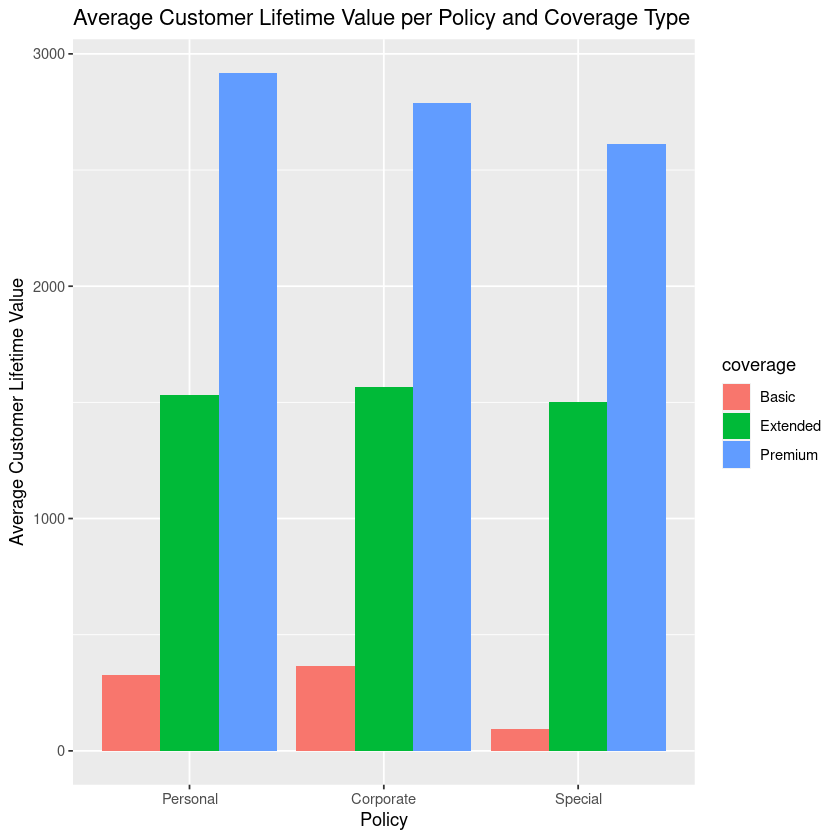

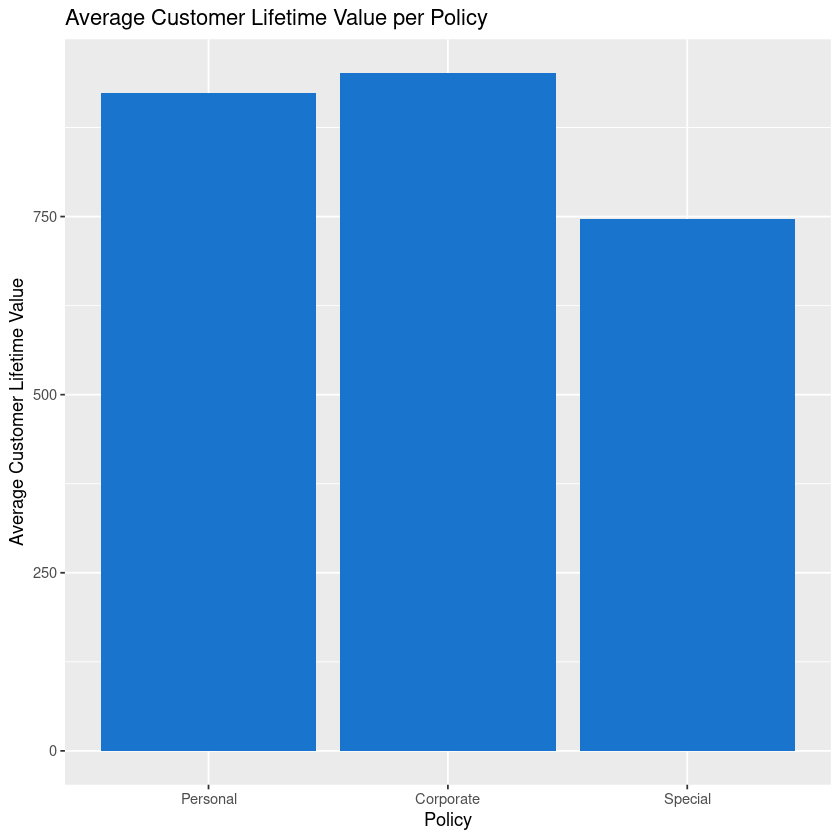

In [6]:
coverage_summary <- claims_df %>%
	group_by(coverage)%>%
	summarise(avg_val = mean(customer_lifetime_value),
			 prem=mean(monthly_premium),
			 claim=mean(total_claims),
			 n=n())
coverage_summary

coverage <- claims_df %>%
	group_by(policy, coverage)%>%
	summarise(avg_val = mean(customer_lifetime_value))
coverage

ggplot(coverage, aes(x=policy, y=avg_val, fill=coverage))+
	geom_bar(stat="identity", position="dodge")+
	labs(title='Average Customer Lifetime Value per Policy and Coverage Type', x='Policy', y='Average Customer Lifetime Value')

policy <- claims_df %>%
	group_by(policy)%>%
	summarise(avg_val = mean(customer_lifetime_value))
policy
ggplot(policy, aes(x=policy, y=avg_val))+
	geom_bar(stat="identity", fill='dodgerblue3')+
	labs(title='Average Customer Lifetime Value per Policy', x='Policy', y='Average Customer Lifetime Value')

## Question 2


**Question**:
Do longer policy holders have a larger lifetime value than short term policy holders?


**Answer**:
Yes, from the supporting graph we can see there is a slight upward trend as shown by the blue trend line. On average, customers who have policies for longer than about 30 months have a lifetime value greater than 0. 

## Supporting Analysis


`geom_smooth()` using formula = 'y ~ x'


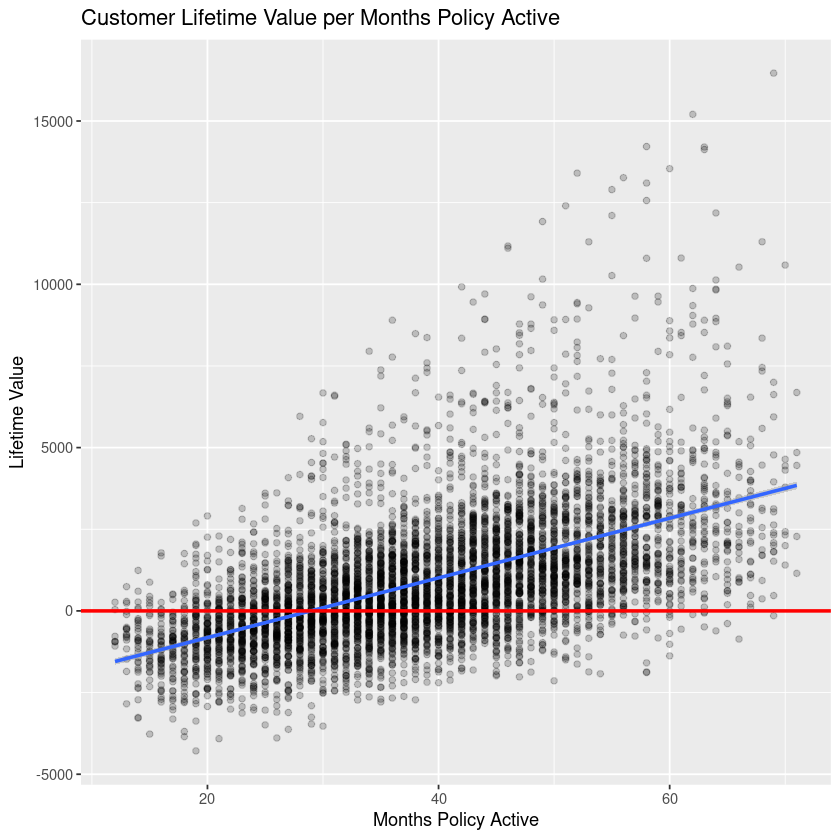

In [21]:
ggplot(claims_df, aes(x=months_policy_active, y=customer_lifetime_value))+
	geom_point(alpha=.2)+ geom_smooth(method = "lm", size =1) + geom_hline(yintercept=0, color="red", size=1)+
	labs(x="Months Policy Active", y="Lifetime Value", title = "Customer Lifetime Value per Months Policy Active")


## Question 3


**Question**:
Is there a difference between customer lifetime value and number of claims filed?


**Answer**:
Yes, there is a difference in the customer lifetime value and the number of claims. Customers with 2 claims have the largest average of \$1429.3 followed by customers with 1 claim (\$66.5), 3 claims (\$312.4), and 4 claims (-\$873.5). One would assume customers with less claims would have a higher lifetime value but, customers with 1 claim have, on average, about \$700 less lifetime value than customers with 2 claims. This could also be due to the fact that the customer group with 2 claims is much larger than the 1 claim group. When we compare the percenatge of each group, more than 70\% of customers with 1 or 2 cliams have a lifetime value greater than \$0 while only 49\% of customer with 3 claims and 26\% of customers with 4 claims have lifetime values greather than \$0.


## Supporting Analysis


total_claims,mean_val,min_val,max_val,median_val,n_customers,pct_grt_0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,666.4840,-1432,5272,419,219,0.7077626
2,1429.2753,-2390,16465,1043,3709,0.7611216
3,312.4304,-3283,13403,-39,1975,0.4911392
4,-873.4595,-4285,8087,-1230,346,0.2630058


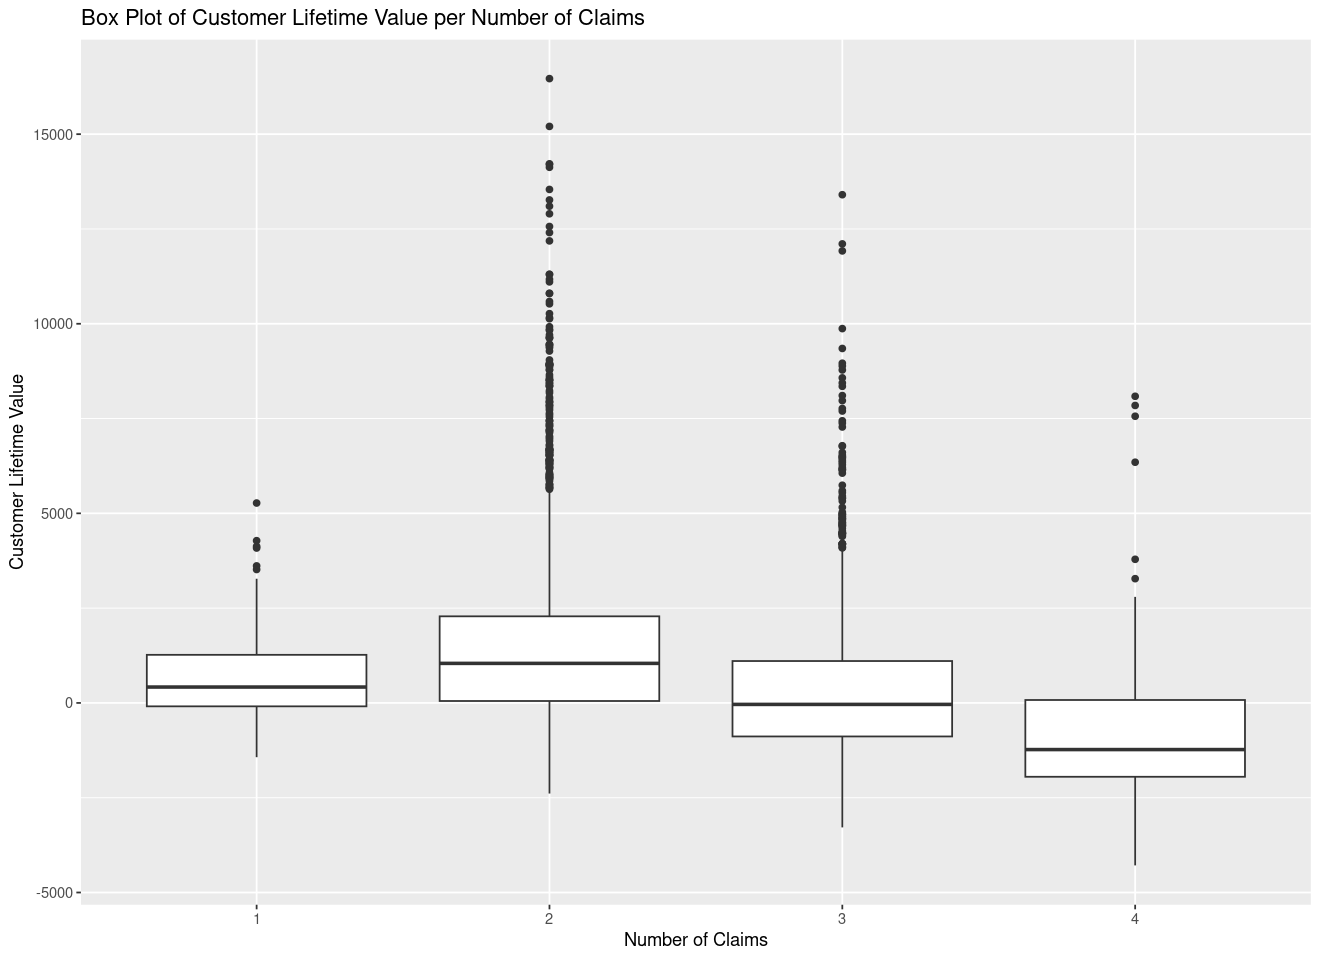

In [68]:
claims_amt_value <-
	claims_df%>%
	group_by(total_claims)%>%
	summarise(mean_val = mean(customer_lifetime_value),
			 min_val = min(customer_lifetime_value),
			 max_val = max(customer_lifetime_value),
			 median_val = median(customer_lifetime_value),
			 n_customers = n(),
			 pct_grt_0 = mean(customer_lifetime_value>=0))
claims_amt_value

ggplot(claims_df, aes(x=as_factor(total_claims), y=customer_lifetime_value))+
	geom_boxplot()+
	labs(title="Box Plot of Customer Lifetime Value per Number of Claims", x="Number of Claims", y="Customer Lifetime Value")

## Question 4


**Question**:
As the Number of claims increase, does the monthly premium increase?

**Answer**:
No, from the table created in the supporting analysis, it looks like the average monthly premium is lower for customers with more claims. This could be because most customers with a high number of claims (3 or 4) have basic coverage which is the cheapest. Digging down a bit more, the months policy active and the monthly premium were plotted per number of claims. From the polts, there seems to be no difference in the monthly premium based on time the policy was active and the number of claims filed. For example, looking between both plots, two and four-door cars with basic coverage have premiums from \$50- about\$75 no matter how many claims have been filed.


## Supporting Analysis

total_claims,mean_prem,mean_active
<dbl>,<dbl>,<dbl>
1,95.61644,23.81279
2,97.31599,39.47830
3,89.31595,39.72861
4,80.69653,39.84393


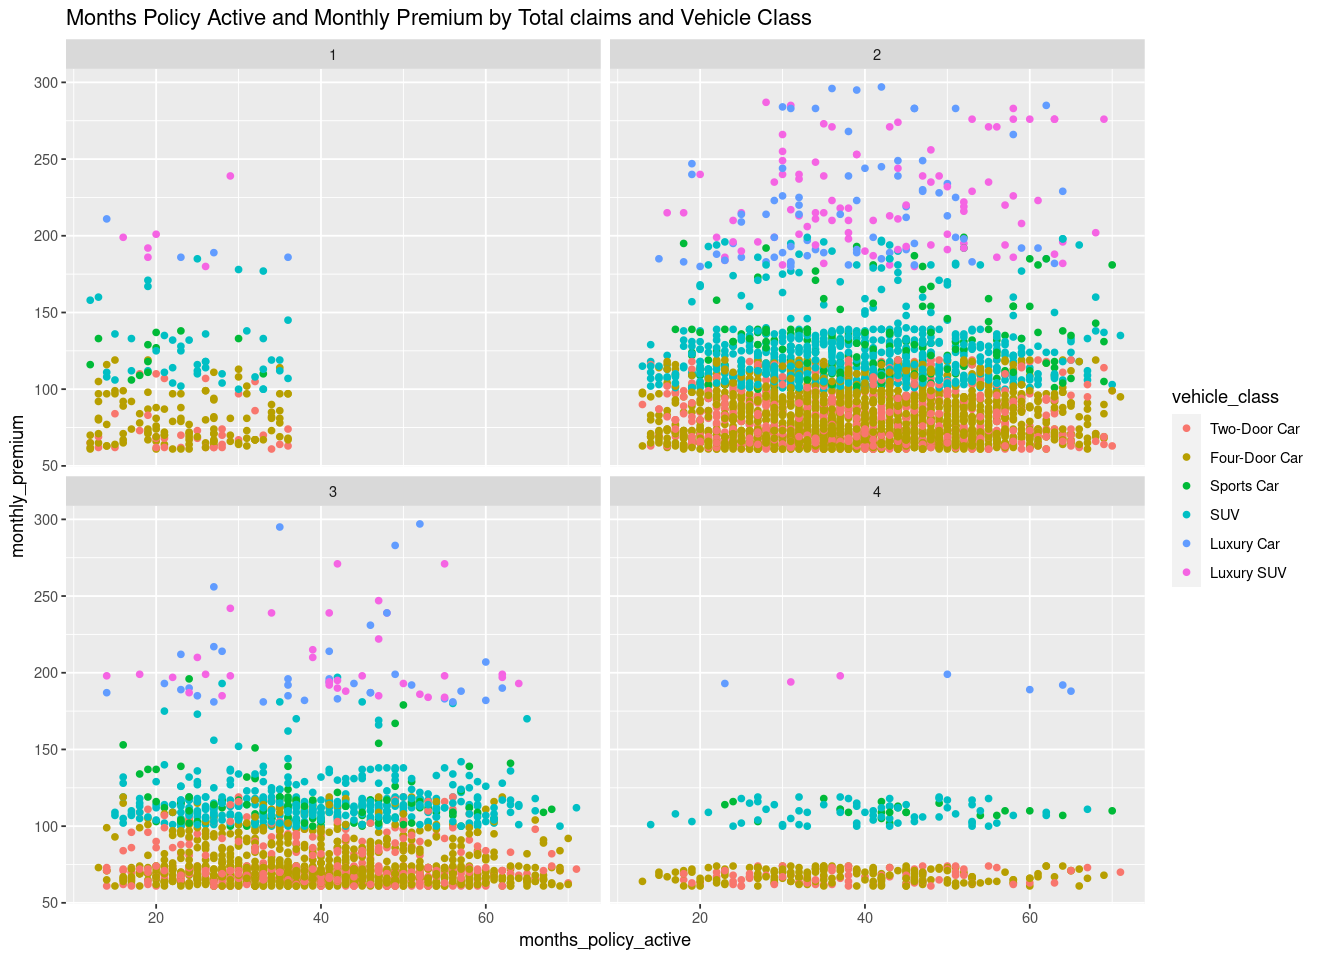

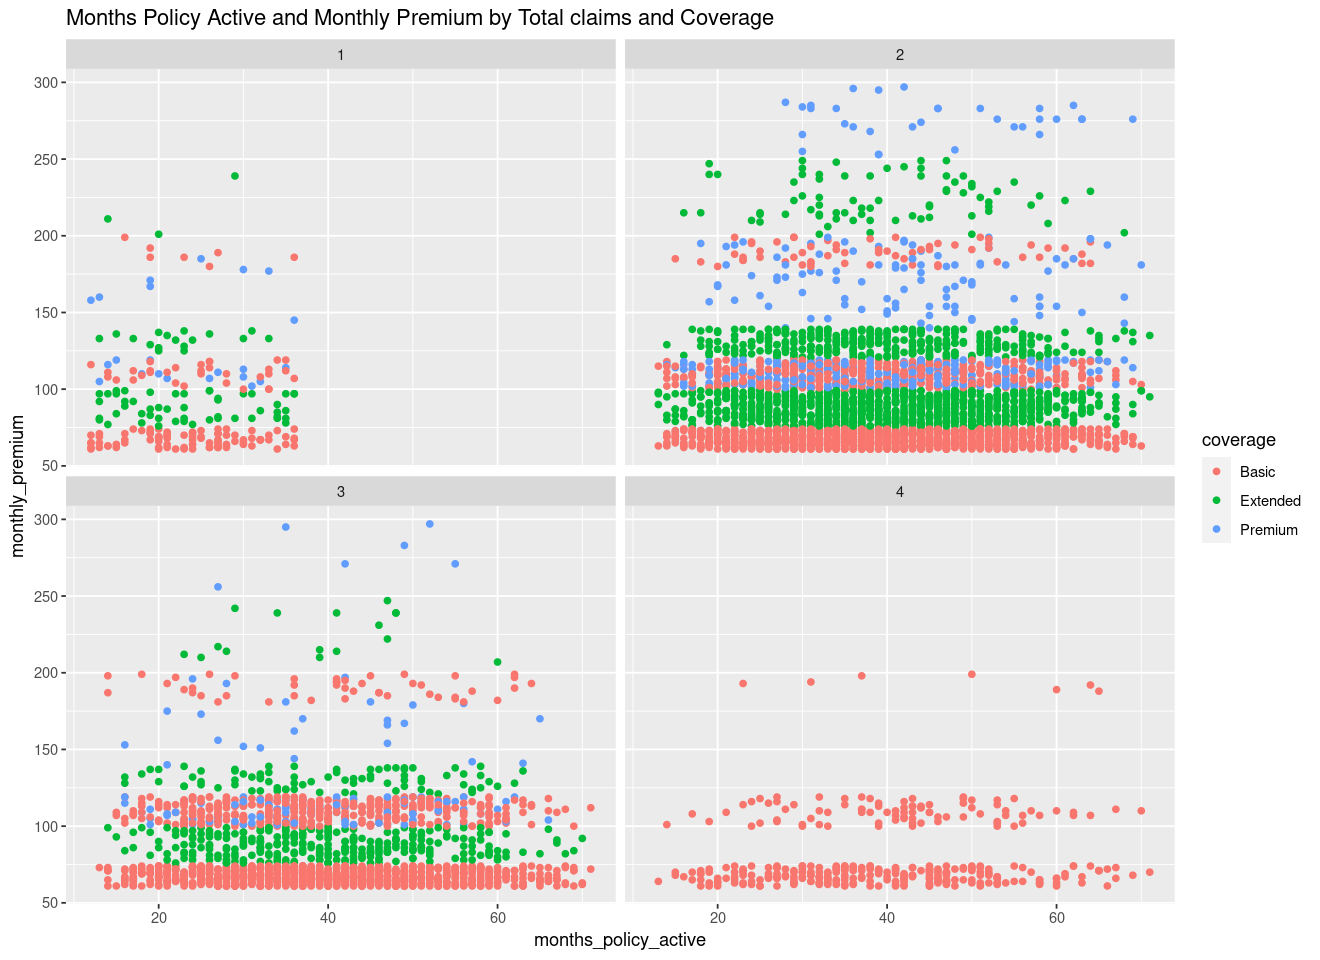

In [34]:
premium_claim <- claims_df %>%
	group_by(total_claims)%>%
	summarize(mean_prem = mean(monthly_premium),
			 mean_active = mean(months_policy_active))
premium_claim

ggplot(claims_df, aes(x=months_policy_active, y=monthly_premium, color=vehicle_class))+
	facet_wrap(~total_claims)+
	geom_point()+
	labs(title= "Months Policy Active and Monthly Premium by Total claims and Vehicle Class")

ggplot(claims_df, aes(x=months_policy_active, y=monthly_premium, color=coverage))+
	facet_wrap(~total_claims)+
	geom_point()+
	labs(title= "Months Policy Active and Monthly Premium by Total claims and Coverage")

## Question 5


**Question**:
Is there a relationship between number of claims and vehicle size/vehicle type?



**Answer**:
Yes, the size of car with the most claims are midsize cars while four-door cars are the vehicle types with the most claims. As shown in the graph, the number of total claims for midsize cars is the largest no matter the vehicle class. Looking at the summary statistics in the stat chart, midsize vehicles account for more than 60\% of all claims in each vehicle class. Four-door cars make up 50\% of all small and midsize vehicle claims and 47\% of large vehicle claims.


## Supporting Analysis


`summarise()` has grouped output by 'vehicle_size'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


vehicle_size,vehicle_class,sum_claims,total_claims_per_vehicle_group,total_claims_per_size_group,percent_claims_per_class,percent_claims_per_size
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Small,Two-Door Car,690,3116,2990,0.22143774,0.23076923
Small,Four-Door Car,1508,7459,2990,0.20217187,0.50434783
Small,Sports Car,119,804,2990,0.14800995,0.03979933
Small,SUV,542,2991,2990,0.18121030,0.18127090
Small,Luxury Car,66,279,2990,0.23655914,0.02207358
Small,Luxury SUV,65,297,2990,0.21885522,0.02173913
Midsize,Two-Door Car,2095,3116,10534,0.67233633,0.19887982
Midsize,Four-Door Car,5273,7459,10534,0.70693122,0.50056958
Midsize,Sports Car,599,804,10534,0.74502488,0.05686349


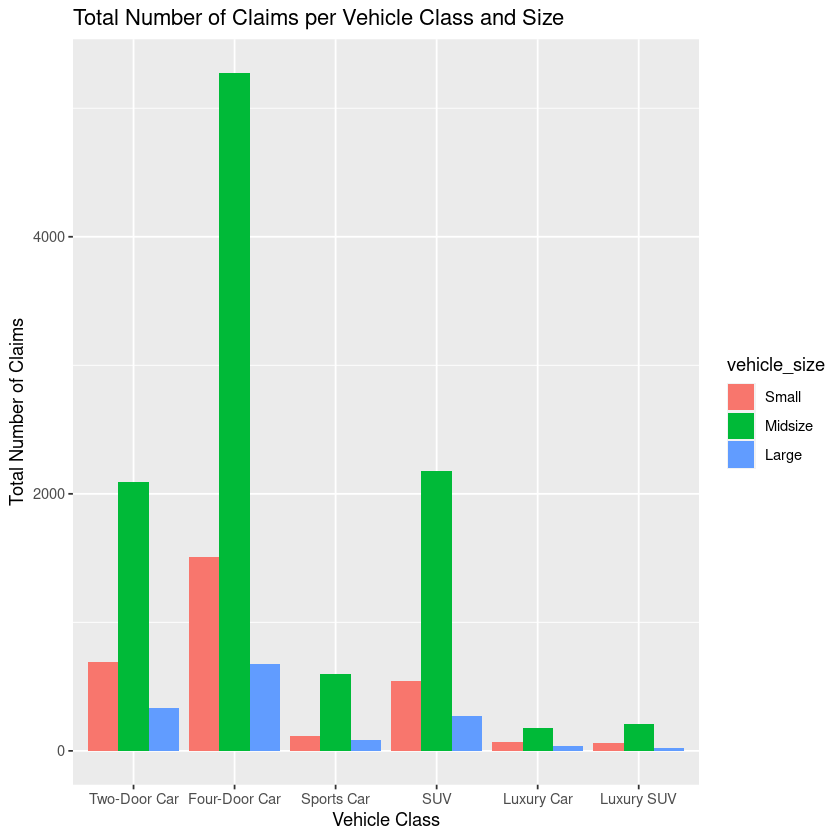

In [7]:
size <- claims_df %>%
	group_by(vehicle_size)%>%
	summarise(total_claims_per_size_group = sum(total_claims))

class <- claims_df %>%
	group_by(vehicle_class)%>%
	summarise(total_claims_per_vehicle_group=sum(total_claims))


count <- claims_df %>%
	group_by(vehicle_size, vehicle_class)%>%
	summarise(sum_claims = sum(total_claims))

stats <- count%>%
 	left_join(class, by='vehicle_class')%>%
	left_join(size, by='vehicle_size')%>%
	mutate(percent_claims_per_class = sum_claims/total_claims_per_vehicle_group,
		  percent_claims_per_size=sum_claims/total_claims_per_size_group)
stats

ggplot(count, aes(x=vehicle_class, y=sum_claims, fill=vehicle_size))+
	geom_bar(position='dodge', stat='identity')+
	labs(title='Total Number of Claims per Vehicle Class and Size', y='Total Number of Claims', x='Vehicle Class')

## Question 6


**Question**:
Following up on question 5 are their certain vehicle types that have a higher customer lifetime value is there any relationship to the number of claims?



**Answer**:
Yes, cars that are considered more "luxury" have higher average customer lifetime values and also have a higher average monthly premium. Seemingly opposite to the number of claims per vehicle class, the class with the highest average customer lifetime value is the Luxury SUV which has the second lowest number of claims. The class with the lowest number of claims, the Luxury Car, has the second highest mean lifetime vlaue. The vehicle type with lowest average customer lifetime value are two-door cars which have the second highest number of total claims. The four-door car, with the highest number of claims, has the second lowest average customer lifetime value. Generally, the vehicle classes with the least amount of claims have a higher average lifetime value per customer. 


## Supporting Analysis


vehicle_class,mean_life,n,mean_premium,claims_sum,mean_claims
<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Two-Door Car,269.3491,1292,77.15248,3116,2.411765
Four-Door Car,271.4142,3124,77.50832,7459,2.387644
Sports Car,2158.8299,335,122.53134,804,2.400000
SUV,1861.4968,1246,119.62761,2991,2.400482
Luxury Car,5669.7647,119,212.68067,279,2.344538
Luxury SUV,6381.5263,133,217.85714,297,2.233083


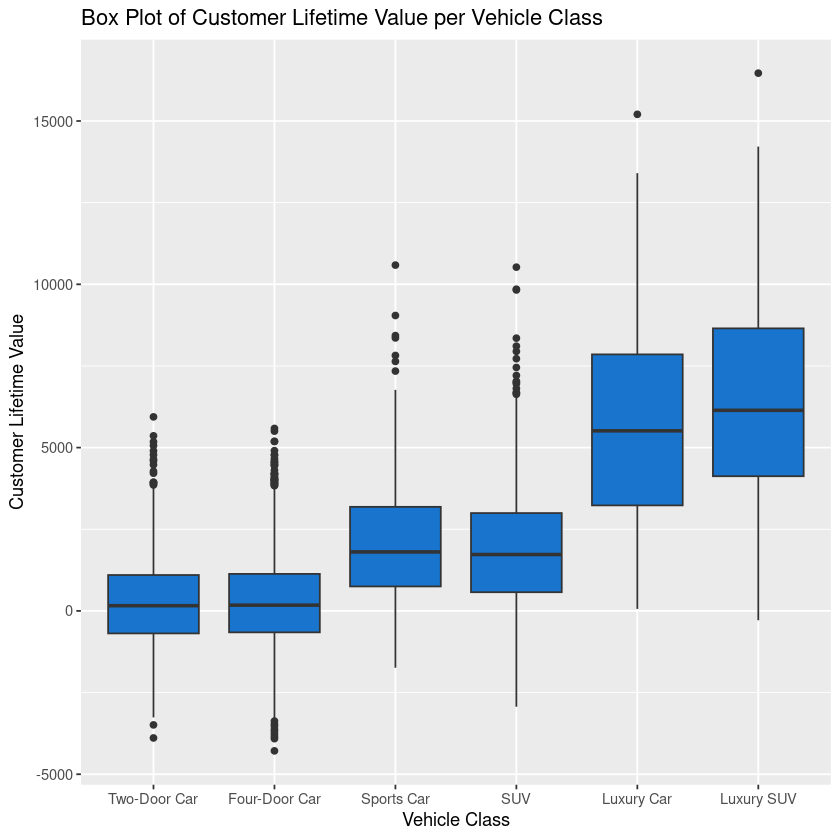

In [4]:
value_class <- claims_df %>%
	group_by(vehicle_class)%>%
	summarise(mean_life = mean(customer_lifetime_value),
			 n = n(),
			 mean_premium = mean(monthly_premium),
			 claims_sum=sum(total_claims),
			 mean_claims = mean(total_claims))
value_class


ggplot(claims_df) +
	geom_boxplot(aes(x=vehicle_class, y=customer_lifetime_value), fill="dodgerblue3")+
	labs(title="Box Plot of Customer Lifetime Value per Vehicle Class", x="Vehicle Class", y="Customer Lifetime Value")


## Question 7


**Question**:
Are there certain demographics that, on average have a lower or higher customer lifetime value? Number of claims?


**Answer**:
Yes, grouping the dataset by different demographics such as gender, highest education completed, employment status, state, marital status, and residence type, we can see the difference in lifetime customer value and claims. Starting with gender, the data set is split fairly even between male and female customers, on average, female customers have a lower number of claims and a lifetime value of \$1,148.0, almost \$500 more on average than males. Looking at higest education completed, the group with the higest lifetime value are customers with masters degrees but tha only makes up \%9 of total customers, they also have the highest premiums on average and lowest claims. More than \%80 of customers are employed. Employed customers have a higer than average monthly premium compared to customers on medical leave, disabled, or retired but have the lowest average customer lifetime value. There does not seem to be any pattern or relationship between states or marital status. Of the residence types, the majority of customers are from the Suburbs which has the highest average lifetime value, and highest average premiums.



## Supporting Analysis


In [94]:
total = nrow(claims_df)

gender <- claims_df %>%
	group_by(gender)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
gender

ed <- claims_df %>%
	group_by(highest_education)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
ed

employ <- claims_df %>%
	group_by(employment_status)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
employ

state <- claims_df %>%
	group_by(customer_state)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
state

married <- claims_df %>%
	group_by(marital_status)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
married

res<- claims_df %>%
	group_by(residence_type)%>%
	summarise(avg_claims= mean(total_claims),
			 avg_val = mean(customer_lifetime_value),
			 avg_prem= mean(monthly_premium),
			 n_cust=n(),
			 percent=(n_cust/total)*100)
res



gender,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Female,2.379289,1148.0390,94.39912,3177,50.84013
Male,2.404622,688.3643,93.19629,3072,49.15987


highest_education,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
High School,2.384660,965.5064,94.70492,1708,27.332373
Associate,2.408573,883.2572,93.03581,1843,29.492719
Bachelor,2.389722,868.3100,93.47752,1868,29.892783
Master,2.359862,1154.1090,95.15052,578,9.249480
Doctoral,2.404762,777.6548,92.74206,252,4.032645


employment_status,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Employed,2.387466,898.5017,94.20586,5154,82.477196
Medical Leave,2.418052,966.1663,90.36342,421,6.737078
Disabled,2.443878,1141.3342,93.99235,392,6.273004
Retired,2.358156,982.0496,91.41844,282,4.512722


customer_state,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Washington,2.402527,867.0668,92.27437,554,8.865418
Oregon,2.384005,947.2933,94.82473,1763,28.212514
California,2.411628,883.1191,93.58093,2150,34.405505
Nevada,2.384359,971.1314,94.54908,601,9.617539
Arizona,2.365792,956.1270,93.04488,1181,18.899024


marital_status,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Single,2.365141,947.1052,94.59202,1027,16.43463
Married,2.397066,915.0200,93.58418,4158,66.53865
Divorced,2.396617,925.4182,93.92481,1064,17.02672


residence_type,avg_claims,avg_val,avg_prem,n_cust,percent
<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Urban,2.395987,563.0488,89.92910,1495,23.92383
Suburban,2.385288,1055.5710,95.49713,3657,58.52136
Rural,2.407475,966.2662,93.46217,1097,17.55481


## Question 8


**Question**:
Is there a relationship between monthly premium and customer lifetime value?


**Answer**:
From the supporting analysis graphic below, we can see a tred/correlation where the higher the monthly premium, the higher the lifetime value. Generally speaking, monthly premiums above \$75 have, on average, a positive customer lifetime value.


## Supporting Analysis


`geom_smooth()` using formula = 'y ~ x'


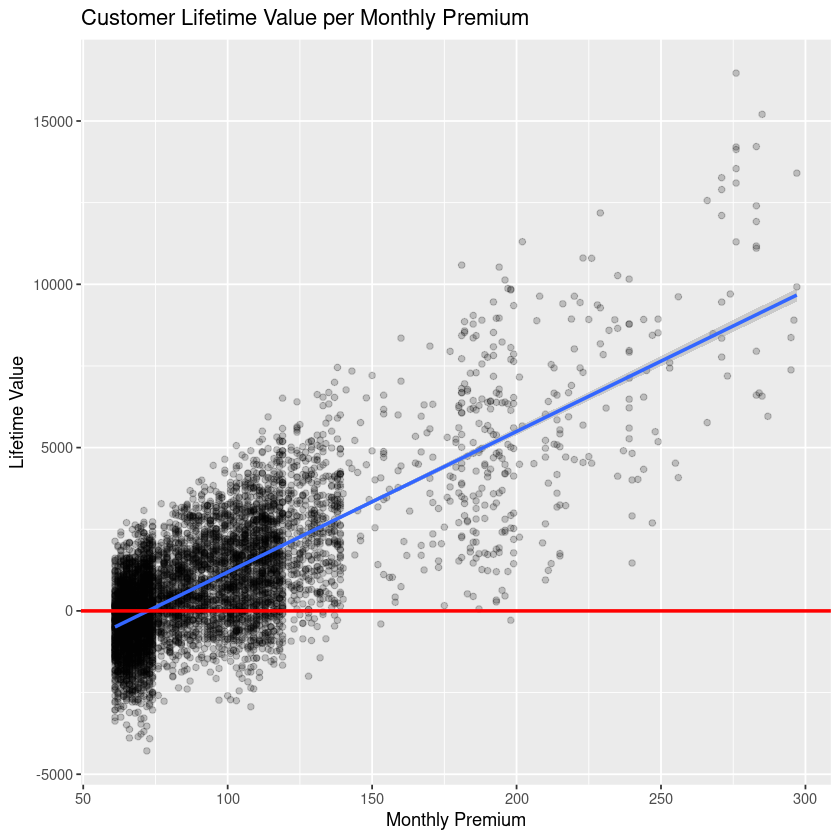

In [9]:
ggplot(claims_df, aes(x=monthly_premium, y=customer_lifetime_value))+
	geom_point(alpha=.2)+ geom_smooth(method = "lm", size =1) + geom_hline(yintercept=0, color="red", size=1)+
	labs(x="Monthly Premium", y="Lifetime Value", title = "Customer Lifetime Value per Monthly Premium")

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
	
An auto insurance company has noticed a decline in profitability from its customers. By analyzing their claims data, they are looking for business solutions to increase profitability. Increasing the company’s profitability is important to ensure they can keep helping customers with their claims while supporting the company and its workers. The goal of this analysis was to investigate high profit and low profit customers and the differences between them. This included the difference between long term and short term customers, vehicle types, policy and coverage, etc. These insights are important because they could help the company identify target customers who have a higher lifetime value, problem customers, most profitable coverage and policy types, and more to create business solutions that can help increase profit.


## Key Findings


After analyzing the claims data from the insurance company, there were several key insights that could support solutions to increase profitability. First, there is a positive correlation between how long a customer stays and their profitability. From the analysis, on average, customers that have policies active for more than 30 months have a positive lifetime value. There was also a positive correlation between monthly premium and lifetime value. IN general, customers with monthly premiums above \$75 had a positive lifetime value. Between the coverage types, basic has the lowest average customer lifetime value followed by extended and premium. Basic coverage customers also have the highest average number of claims (the only customers with 4 claims) and the lowest average monthly premium. We know from analyzing the data, that customer lifetime value is lower, on average when customers have a higher number of claims and low monthly premiums making basic coverage customers a problem group to investigate further. Dialing in on the coverage groups, their claims, and monthly premiums, there  seems to be no increase in monthly premium the higher the number of claims filed. As the average customer lifetime value goes down with the number of claims filed, the company may want to consider ways to make customers with more claims more profitable by increasing their premium as their claims go up. Through this analysis, we also found that midsize cars have the highest number of claims in all vehicle classes and the vehicle class with the most claims are four-door cars. Four-door cars also happen to have the second lowest average customer lifetime value. As the class of car increases from two-door luxury SUV, we see the average premium increase and the average lifetime value also increase, a common theme throughout the analysis. Lastly, customer demographics were studied to pin point characteristics of high and low value customers. In asking this question, we found that females had a higher average lifetime value (more than \$400 on average) than males, customers with masters degrees are highly profitable but make up less than 10% of customers, and customers that live in suburban areas have a higher lifetime value than rural or urban areas. These insights into demographics help the company find problem customers, males, and target highly profitable customers, customers with masters degrees and suburban customers, to make adjustments to premiums and marketing strategies to increase profit. 


## Recommendations

With a focus on increasing profitability, there are a few recommendations that the insurance company could make to achieve this goal. Because the length of the policy is positively correlated to lifetime value, the insurance company could offer longer monthly policies or incentivize customers looking to leave with lower premiums in order to keep them longer (given they don’t have a lot of claims). Because of the positive correlation, by retaining current customers longer, the insurance company could see and increase in profits. Seeing that the monthly premium does not increase with the number of claims and customers with a higher number of claims are less profitable, the insurance company should look into increasing monthly premiums for those customers in an effort to close the gap on the profit they are losing from the high number of claims. The increase in premiums based on claims could also incentivize customers to drive safer and prevent more accidents in an effor to keep thier premium lower. A trend throughout the analysis was that groups with higher premiums, on average, had higher lifetime value. This insight could help drive marketing strategies to attract new customers with more luxury vehicles, or try to sell more extended and premium coverage plans. These reccomendations aim to decrease the company's loss on claims and increase profit through high value coverage plans and retaining customers for longer. 

